# Chapter 2: Hierarchical Clustering

# Activity 2

1. Visualize the dataset that we created in Exercise 7, Building a Hierarchy.

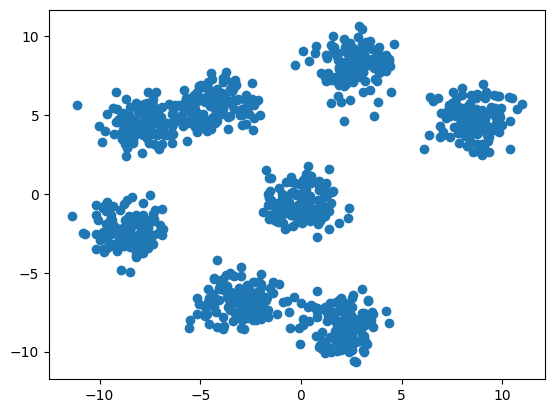

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

2. Create a list with all the possible linkage method hyperparameters.

In [2]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']

3. Loop through each of the methods in the list that you just created and display the effect they have on the same dataset. 

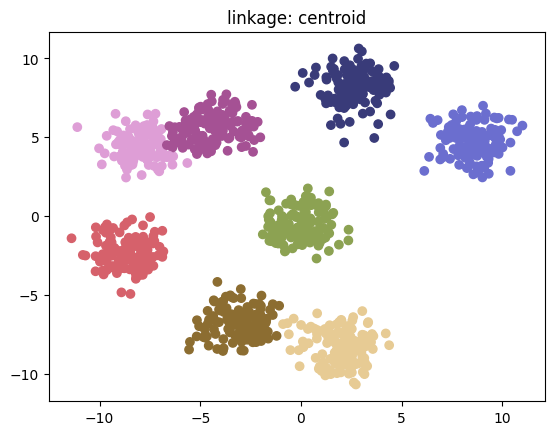

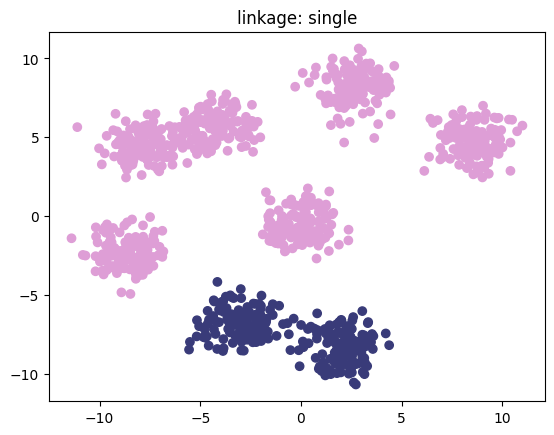

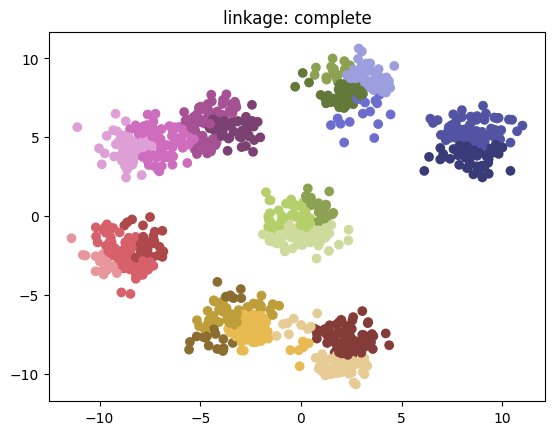

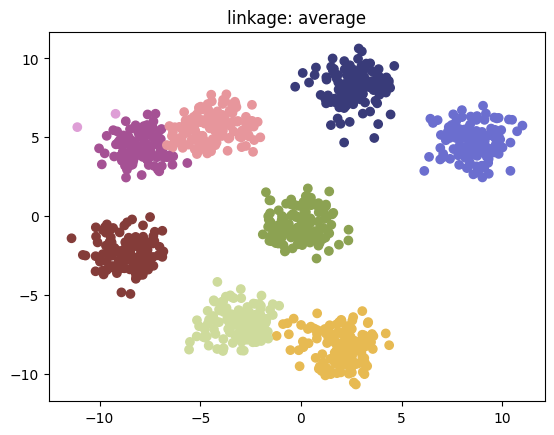

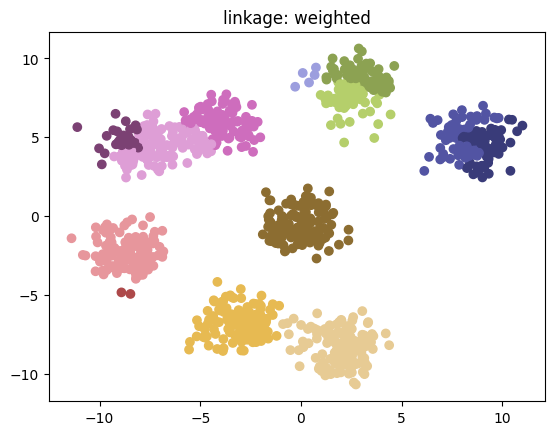

In [3]:
for method in methods:
    distances = linkage(X, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance") 
    plt.title('linkage: ' + method)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
    plt.show()

# Activity 3

1. Import the necessary packages from scikit-learn (KMeans, AgglomerativeClustering, and silhouette_score).

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

2. Read the wine dataset into the pandas DataFrame and print a small sample.

In [5]:
wine_df = pd.read_csv("wine_data.csv")
print(wine_df.head)

<bound method NDFrame.head of      OD_read  Proline
0       3.92   1065.0
1       3.40   1050.0
2       3.17   1185.0
3       3.45   1480.0
4       2.93    735.0
..       ...      ...
173     1.74    740.0
174     1.56    750.0
175     1.56    835.0
176     1.62    840.0
177     1.60    560.0

[178 rows x 2 columns]>


3. Visualize the wine dataset to understand its data structure.

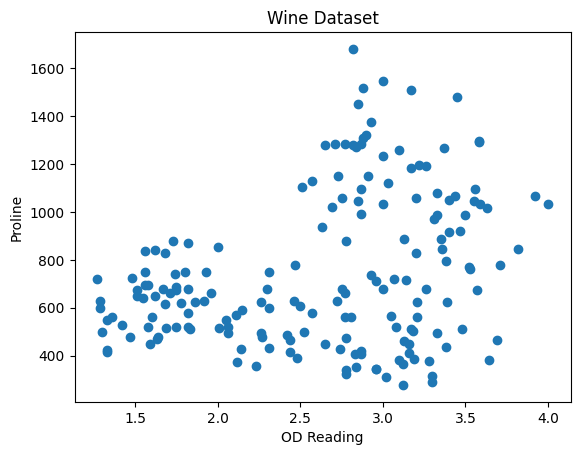

In [6]:
# Visualize the data
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title("Wine Dataset")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

4. Use the sklearn implementation of k-means on the wine dataset, knowing that there are three wine types.

In [7]:
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

C:\Users\patwh\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

5. Use the sklearn implementation of hierarchical clustering on the wine dataset.

In [8]:
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine_df)

6. Plot the predicted clusters from k-means.

In [9]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

NameError: name 'km_clusters' is not defined

7. Plot the predicted clusters from hierarchical clustering.

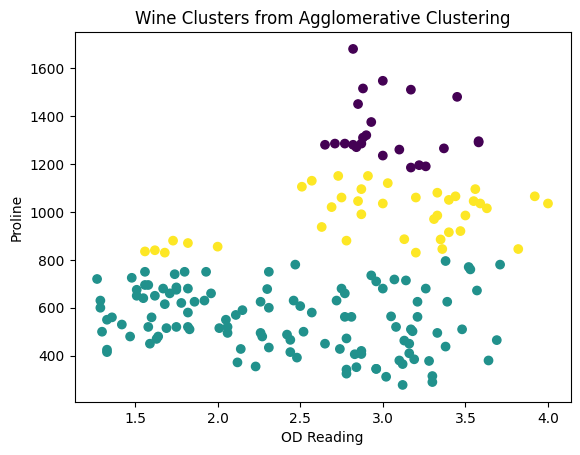

In [10]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title("Wine Clusters from Agglomerative Clustering")
plt.xlabel("OD Reading")
plt.ylabel("Proline")
plt.show()

8. Compare the silhouette score of each clustering method.

In [12]:
print("Silhouette Scores for Wine Dataset:\n")
# print("K-Means Clustering: ", silhouette_score(wine_df, km_clusters))
print("Agg Clustering: ", silhouette_score(wine_df, ac_clusters))

Silhouette Scores for Wine Dataset:

Agg Clustering:  0.5988495817462


# Exercise 7: Building a Hierarchy

1. Generate some dummy data:

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

2. Visualize the data

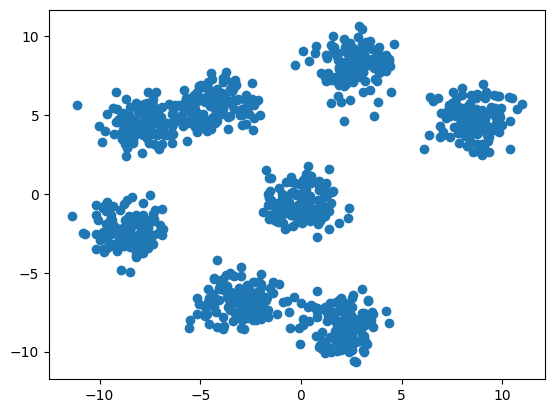

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.show()

3. Generate the distance matrix

In [15]:
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


4. Pass it through the dendrogram function provided by SciPy

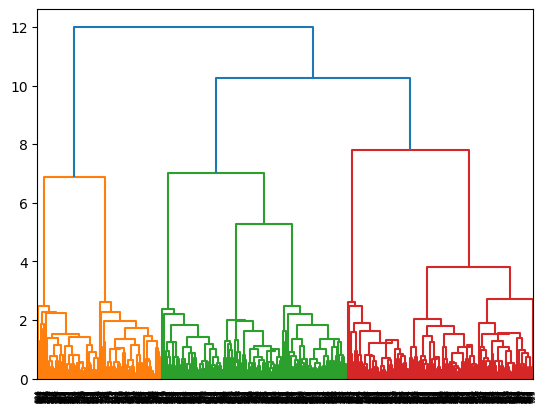

In [16]:
dn = dendrogram(distances)
plt.show()

5. Use the fcluster function from SciPy

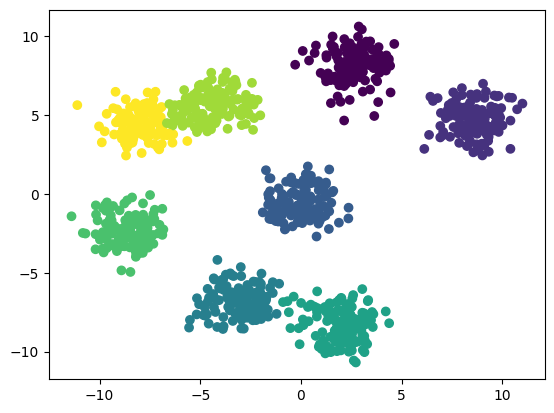

In [17]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()